In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [25]:
df=pd.read_csv('data_eda.csv')


In [26]:
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','hourly','employer_provided',
             'job_state','age','python','sql', 'excel','job_simp','seniority','desc_len']]


In [27]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [28]:
df_dum

,avg_salary,Rating,hourly,employer_provided,age,python,sql,excel,desc_len,Size_-1,...,job_state_ RI,job_state_ TN,job_state_ TX,job_state_ UT,job_state_ VA,job_state_ WY,job_simp_analyst,seniority_jr,seniority_na,seniority_senior
0,48.0,4.3,0,0,91,0,0,0,870,0,...,0,0,1,0,0,0,1,0,1,0
1,78.0,2.6,0,0,-1,0,0,0,1004,0,...,0,0,0,0,0,0,1,0,1,0
2,57.0,3.8,0,0,44,0,0,0,875,0,...,0,0,0,0,0,0,1,1,0,0
3,85.0,4.1,0,0,-1,0,1,0,749,0,...,0,0,1,0,0,0,1,0,1,0
4,90.0,4.0,0,0,16,0,0,0,1240,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,59.5,3.8,0,0,-1,0,0,0,956,0,...,0,0,0,0,0,0,1,0,1,0
178,77.0,4.1,0,0,23,0,0,0,775,0,...,0,0,0,0,0,0,1,1,0,0
179,77.5,5.0,0,0,-1,0,0,0,1061,0,...,0,0,0,0,1,0,1,1,0,0
180,83.5,4.3,0,0,6,0,0,0,870,0,...,0,0,0,0,0,0,1,0,1,0


In [29]:
df_dum.columns

Index(['avg_salary', 'Rating', 'hourly', 'employer_provided', 'age', 'python',
       'sql', 'excel', 'desc_len', 'Size_-1',
       ...
       'job_state_ RI', 'job_state_ TN', 'job_state_ TX', 'job_state_ UT',
       'job_state_ VA', 'job_state_ WY', 'job_simp_analyst', 'seniority_jr',
       'seniority_na', 'seniority_senior'],
      dtype='object', length=123)

In [7]:
# df_dum=df_dum.drop(columns=['Size_-1'])

In [30]:
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

In [9]:
# df_dum.to_csv('df_dum.csv',index=False)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# multiple linear regression 
import statsmodels.api as sm
print(X)
X_sm = X = sm.add_constant(X)


     Rating  hourly  employer_provided  age  python  sql  excel  desc_len  \
0       4.3       0                  0   91       0    0      0       870   
1       2.6       0                  0   -1       0    0      0      1004   
2       3.8       0                  0   44       0    0      0       875   
3       4.1       0                  0   -1       0    1      0       749   
4       4.0       0                  0   16       0    0      0      1240   
..      ...     ...                ...  ...     ...  ...    ...       ...   
177     3.8       0                  0   -1       0    0      0       956   
178     4.1       0                  0   23       0    0      0       775   
179     5.0       0                  0   -1       0    0      0      1061   
180     4.3       0                  0    6       0    0      0       870   
181     3.3       0                  0  119       0    0      0      1248   

     Size_-1  Size_1 to 50 Employees  ...  job_state_ RI  job_state_ TN  \


In [11]:
print(X_sm)

In [32]:
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     103.4
Date:                Thu, 22 Jun 2023   Prob (F-statistic):           2.04e-68
Time:                        17:39:32   Log-Likelihood:                -360.80
No. Observations:                 182   AIC:                             897.6
Df Residuals:                      94   BIC:                             1180.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Rating                                                 1.7762      1.195      1.486      0.141      -0.597       4.150
hourly                                               -62.1550      3.249    -19.131      0.000     -68.606     -55.704
employer_provided                                  -1.149e-11   3.39e-12     -3.387      0.001   -1.82e-11   -4.75e-12
age                                                   -0.1583      0.035     -4.571      0.000      -0.227      -0.090
python                                                28.4405      8.782      3.238      0.002      11.003      45.878
sql                                                   -4.8283      3.415     -1.414      0.161     -11.609       1.953
excel                                                 -0.0790      1.935     -0.041      0.968      -3.921       3.763
desc_len                                               0.0042      0.002      1.961      0.053   -5.21e-05       0.008
Size_-1                                               12.7742      2.008      6.361      0.000       8.787      16.762
Size_1 to 50 Employees                                -3.8098      2.965     -1.285      0.202      -9.697       2.078
Size_10000+ Employees                                 16.2179      2.041      7.945      0.000      12.165      20.271
Size_1001 to 5000 Employees                            0.7508      1.570      0.478      0.634      -2.367       3.869
Size_201 to 500 Employees                            -15.7439      2.680     -5.874      0.000     -21.066     -10.422
Size_5001 to 10000 Employees                          13.2892      3.096      4.292      0.000       7.141      19.437
Size_501 to 1000 Employees                            -4.2543      4.947     -0.860      0.392     -14.077       5.568
Size_51 to 200 Employees                              25.7709      2.921      8.821      0.000      19.970      31.571
Size_Unknown                                           7.8849      5.708      1.381      0.170      -3.449      19.219
Type of ownership_ Private                           -23.9040      3.524     -6.783      0.000     -30.901     -16.907
Type of ownership_ Public                            -16.2083      3.663     -4.425      0.000     -23.482      -8.935
Type of ownership_1                                   12.7742      2.008      6.361      0.000       8.787      16.762
Industry_-1                                            5.3863      1.306      4.125      0.000       2.794       7.979
Industry_Advertising & Public Relations               -4.3042      1.420     -3.030      0.003      -7.124      -1.484
Industry_Aerospace & Defense                           0.3327      1.614      0.206      0.837      -2.871  

In [33]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-1265.135987583302

In [35]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))


-8.87860520792116

/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.98468463955606, tolerance: 2.476893583333334
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.750444526683168, tolerance: 2.476893583333334
  model = cd_fast.enet_coordinate_descent(
/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.394834849171588, tolerance: 3.0328928699484528
  model = cd_fast.enet_coordinate_descent(


,alpha,error
0,0.01,-6.272042


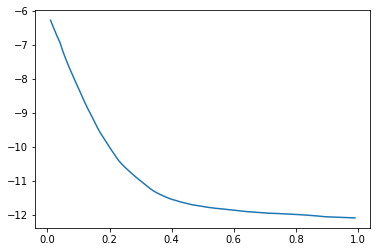

In [36]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [37]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-7.356763470804989

In [38]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [39]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

8241.599362232251

In [41]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf))

16523.91952026118

In [42]:
y_test,(tpred_lm+tpred_rf)/2

(array([ 54.   ,  72.5  ,  43.51 , 103.5  , 103.5  ,  60.   ,  73.   ,
         63.   ,  72.5  , 102.   ,  75.   ,  81.5  ,  71.   ,  75.5  ,
         62.5  ,  39.   , 103.5  ,  67.5  ,  74.   ,  84.   ,  95.5  ,
         33.035,  99.   ,  66.   ,  57.5  ,  44.5  ,  77.5  ,  56.   ,
         57.   ,  72.5  ,  83.   ,  66.   ,  71.   ,  75.5  ,  75.   ,
         83.5  ,  87.5  ]),
 array([-2.16564753e+04,  7.20722222e+01, -1.91863073e+04,  1.00975000e+02,
         1.00975000e+02, -2.21149576e+04,  1.87993128e+03,  6.40166666e+01,
         7.20722222e+01, -8.05624090e+04, -1.00575637e+04,  9.31106642e+03,
         7.24888889e+01,  7.52388890e+01,  6.11000000e+01, -3.01536859e+04,
         1.00975000e+02,  6.70611111e+01,  7.39388889e+01,  8.44111111e+01,
         1.13435764e+03,  3.69170000e+01,  9.83277778e+01,  6.64833334e+01,
        -2.54244487e+04,  5.44361111e+01,  7.66111111e+01, -7.30520171e+04,
         6.10305556e+01,  7.29645833e+01,  8.29500000e+01,  6.64833334e+01,
         

In [43]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[3.6,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 802.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0]